In [1]:
import sqlalchemy as sq
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
engine = sq.create_engine("sqlite:///data/covid_db.sqlite")
cnx = engine.connect()

In [4]:
meta = sq.MetaData()
meta.reflect(bind=engine)

In [5]:
meta.tables.keys()

dict_keys(['covid_states', 'covid_world'])

In [6]:
df = pd.read_sql('covid_states',con=cnx)
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21694 entries, 0 to 21693
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                21694 non-null  datetime64[ns]
 1   state                               21694 non-null  object        
 2   fips                                21694 non-null  int64         
 3   cases                               21694 non-null  int64         
 4   deaths                              21694 non-null  int64         
 5   pop                                 21694 non-null  int64         
 6   new_cases                           21642 non-null  float64       
 7   weekly_rolling_new_cases            21330 non-null  float64       
 8   new_deaths                          21642 non-null  float64       
 9   weekly_rolling_new_deaths           21330 non-null  float64       
 10  cases_per_100k        

In [11]:
vax_cols = [col for col in df.columns if 'vacc' in col]
cols = ['iso_code', 'continent', 'location', 'date'] + vax_cols

In [12]:
vax_cols

['total_vaccinations',
 'one_dose_vaccinated',
 'all_doses_vaccinated',
 'total_vaccinations_per_hundred',
 'one_dose_vaccinated_per_hundred',
 'all_doses_vaccinated_per_hundred']

In [13]:
new_name = {
     'people_vaccinated':'one_dose_vaccinated',
     'people_fully_vaccinated':'all_doses_vaccinated',
     'new_vaccinations':'new_doses_administered',
     'new_vaccinations_smoothed':'new_doses_administered_smoothed',
     'people_vaccinated_per_hundred':'one_dose_vaccinated_per_hundred',
     'people_fully_vaccinated_per_hundred':'all_doses_vaccinated_per_hundred',
     'new_vaccinations_smoothed_per_million':'new_doses_administered_smoothed_per_million'
}

[Source](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv) for what the columns represent

In [14]:
vax_df = df[cols]
vax_df = vax_df.rename(new_name, axis=1)

In [15]:
small_df = vax_df[(vax_df['location']=='United States') |
                  (vax_df['location']=='Canada') |
                  (vax_df['location']=='Hungary')
                 ]

<AxesSubplot:xlabel='date', ylabel='one_dose_vaccinated_per_hundred'>

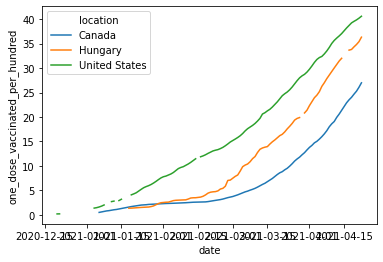

In [16]:
sns.lineplot(x='date',y='one_dose_vaccinated_per_hundred', 
             data=small_df, 
             hue='location')